In [41]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
from Madule import plots
import arviz as az
from scipy import stats


In [42]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/{partcipant_group}/HierRL_Mixture_notdual_dual_twoLR_Act_Clr_model1_individual_without_Weight.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit_HC = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
#log_lik = fit_HC['log_lik']


In [43]:
az.summary(fit_HC)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"hier_alphaAct_pos_mu1[0, 0]",1.265,0.605,0.167,2.395,0.120,0.086,26.0,866.0,1.06
"hier_alphaAct_pos_mu1[0, 1]",-0.023,0.995,-1.780,1.736,0.325,0.237,10.0,1051.0,1.14
"hier_alphaAct_pos_mu1[1, 0]",0.831,0.597,-0.172,1.936,0.161,0.116,14.0,883.0,1.10
"hier_alphaAct_pos_mu1[1, 1]",0.405,0.899,-1.497,1.954,0.070,0.050,161.0,861.0,1.02
"hier_alphaAct_neg_mu1[0, 0]",-0.838,0.638,-1.971,0.269,0.312,0.238,4.0,20.0,1.40
...,...,...,...,...,...,...,...,...,...
"transfer_hier_alphaClr_mu2[1, 1]",0.533,0.162,0.238,0.825,0.074,0.056,5.0,82.0,1.33
"transfer_hier_sensitivity_mu2[0, 0]",0.715,1.145,0.000,2.842,0.522,0.394,3.0,52.0,1.83
"transfer_hier_sensitivity_mu2[0, 1]",1.163,1.760,0.004,4.725,1.081,0.869,3.0,17.0,1.60
"transfer_hier_sensitivity_mu2[1, 0]",0.712,1.148,0.011,3.308,0.546,0.415,4.0,38.0,1.46


In [4]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'PD'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit_PD = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
log_lik = fit_PD['log_lik']


In [5]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos_HC = fit_HC["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg_HC = fit_HC["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos_HC = fit_HC["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg_HC = fit_HC["transfer_hier_alphaClr_neg_mu"] 
weight_HC = fit_HC["transfer_hier_weight_mu"] 
beta_HC = fit_HC["transfer_hier_sensitivity_mu"]

In [6]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos_PD = fit_PD["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg_PD = fit_PD["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos_PD = fit_PD["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg_PD = fit_PD["transfer_hier_alphaClr_neg_mu"] 
weight_PD = fit_PD["transfer_hier_weight_mu"] 
beta_PD = fit_PD["transfer_hier_sensitivity_mu"]

(0.0, 1.0)

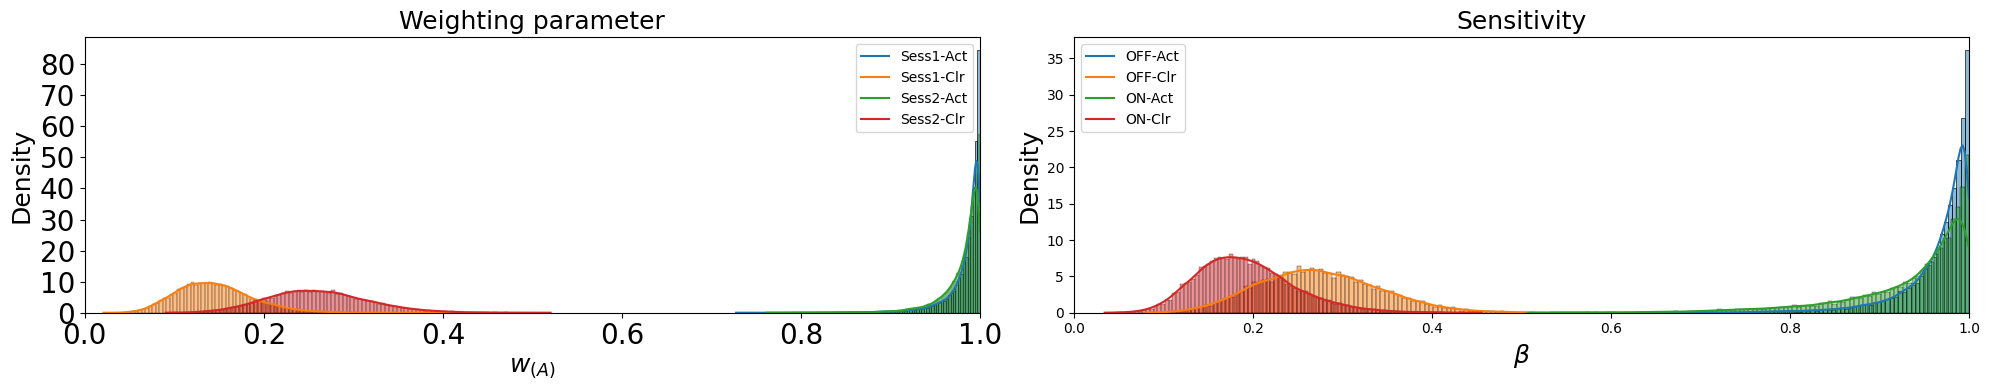

In [9]:
fig = plt.figure(figsize=(20, 4), tight_layout=True)
rows = 1
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(weight_HC[0,0], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[0,1], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[1,0], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[1,1], kde=True, stat='density', bins=100)
plt.title('Weighting parameter',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel('$w_{(A)}$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 1)

# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(weight_PD[0,0], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[0,1], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[1,0], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[1,1], kde=True, stat='density', bins=100)
plt.title('Sensitivity',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 
plt.xlim(0, 1)

(array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 [Text(-0.30000000000000004, 0, '−0.3'),
  Text(-0.20000000000000004, 0, '−0.2'),
  Text(-0.10000000000000003, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.09999999999999998, 0, '0.1'),
  Text(0.19999999999999996, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5')])

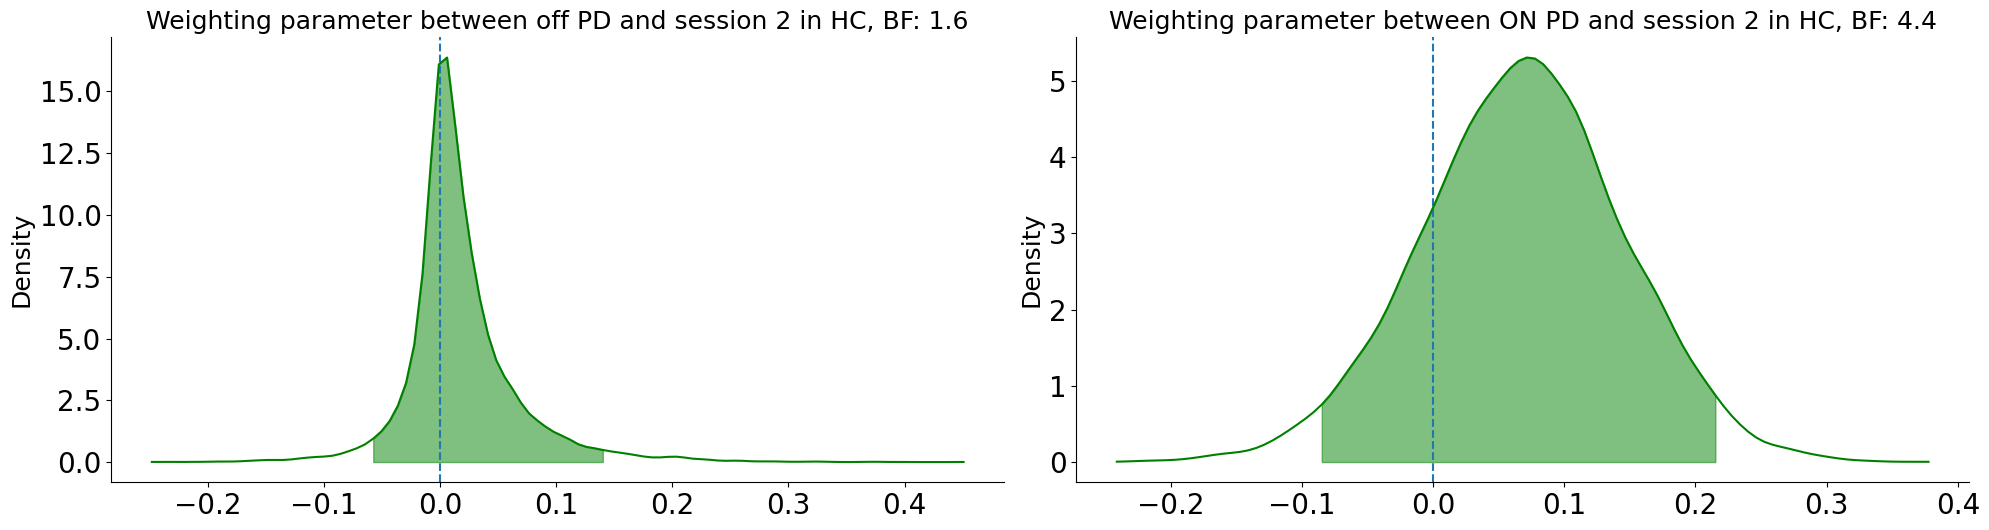

In [12]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 10), tight_layout=True)
rows = 2
columns = 2

# Action Learning Rate
fig.add_subplot(rows, columns, 1)
plots.plot_posterior(x=weight_HC[0,0] - weight_PD[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight_HC[1,0] - weight_PD[0,0])>0)
bf = i/(1-i)
plt.title(f'Weighting parameter between off PD and session 2 in HC, BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Action Learning Rate
fig.add_subplot(rows, columns, 2)
plots.plot_posterior(x=weight_HC[1,1] - weight_PD[1,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight_HC[1,1] - weight_PD[1,1])>0)
bf = i/(1-i)
plt.title(f'Weighting parameter between ON PD and session 2 in HC, BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


In [29]:
waic = np.array([21262, 21277, 21396,21298, 21281, 21602])

In [30]:
dwaic = waic -np.min(waic)
weight = np.zeros(len(waic))

In [31]:
weight

array([0., 0., 0., 0., 0., 0.])

In [32]:
for i in range(len(waic)):
   weight[i] = np.exp(-dwaic[i]/2)/np.sum(np.exp(-dwaic/2))

In [33]:
weight

array([9.99372443e-01, 5.52737278e-04, 7.97989326e-30, 1.52204221e-08,
       7.48048561e-05, 1.47796941e-74])

In [18]:
np.sum(np.exp(-dwaic/2))

1.0

In [17]:
dwaic

array([  119,   206,     0, 23924])

In [ ]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
behAll = behAll[behAll['patient']=='HC']

In [33]:
sublist = behAll['sub_ID'].unique()

In [44]:
transfer_weight = fit_HC['transfer_weight']

sub-030
sub-034
sub-067
sub-069
sub-076
sub-077
sub-083


(0.0, 1.0)

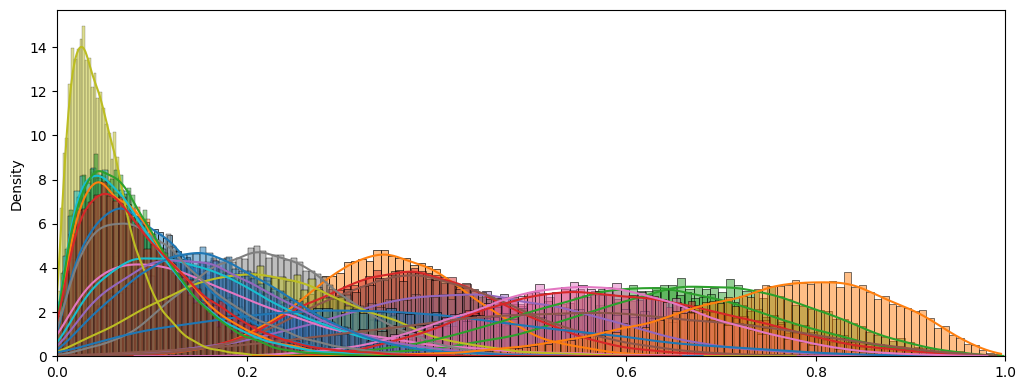

In [38]:
fig = plt.figure(figsize=(20, 4), tight_layout=True)
rows = 1
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)

for i in range(len(sublist)):
    sns.histplot(transfer_weight[i,1,1,:], kde=True, stat='density', bins=100)
    if (transfer_weight[i,1,1,:].mean()>.4):
        print(sublist[i])
plt.xlim(0, 1)


In [8]:
# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']
len(subList)

46

In [35]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')


In [36]:
withdraw_subs = ['sub-030','sub-034','sub-067','sub-069','sub-076','sub-077','sub-083']
for sub in withdraw_subs:
    behAll = behAll[behAll['sub_ID']!=sub]

In [39]:
behAll['sub_ID'].unique().shape

(39,)

In [33]:
len(sublist)

39

In [24]:
np.where(subList,'sub-004')

IndexError: arrays used as indices must be of integer (or boolean) type

ValueError: operands could not be broadcast together with shapes (46,) (2,) 

In [51]:
fit_HC['theta'].shape

(24, 4000)

(0.0, 1.0)

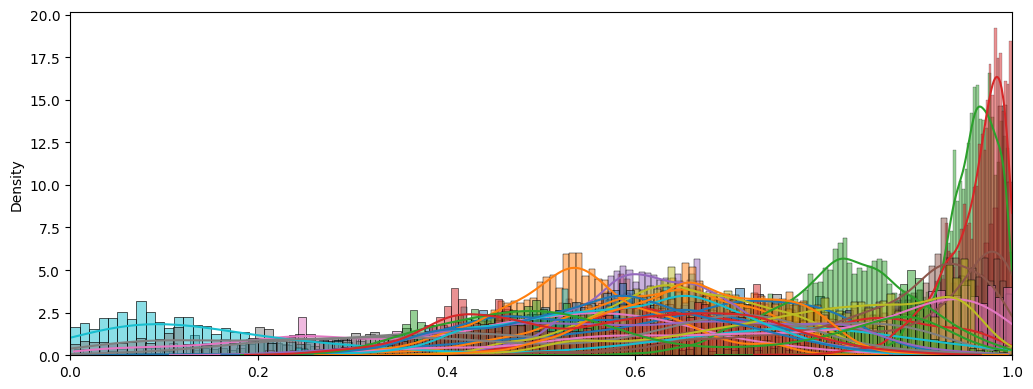

In [52]:
fig = plt.figure(figsize=(20, 4), tight_layout=True)
rows = 1
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)

for i in range(24):
    sns.histplot(fit_HC['theta'][i], kde=True, stat='density', bins=100)
plt.xlim(0, 1)


In [55]:
prob_model = fit_HC['theta'].mean(axis=1)

In [65]:
np.prod(prob_model/(1-prob_model))

822250511.940593

In [66]:
prob_model/(1-prob_model)

array([ 1.93018125,  1.66455937, 21.36464645,  2.65540263,  1.71331509,
        6.4055439 ,  0.87599978,  1.39768668,  1.92025079,  0.83267952,
        1.39186457,  1.16958042,  4.65398908, 22.70502646,  1.57986026,
        6.47064457,  3.44902813,  0.99823755,  3.83559985,  1.45220131,
        1.36187493,  2.03410594,  1.63616786,  1.37362345])

In [61]:
?np.dot

Call signature:  np.dot(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <built-in function dot>
Docstring:      
dot(a, b, out=None)

Dot product of two arrays. Specifically,

- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).

- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using :func:`matmul` or ``a @ b`` is preferred.

- If either `a` or `b` is 0-D (scalar), it is equivalent to
  :func:`multiply` and using ``numpy.multiply(a, b)`` or ``a * b`` is
  preferred.

- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.

- If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
  sum product over the last axis of `a` and the second-to-last axis of
  `b`::

    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

It uses an optimized BLAS library when possible (see `numpy.linalg`).

Parameters
----------
a : array_like
    Fi